# Pasos iniciales

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [19]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


#  Voy hacer una comparacion de densidades, entre las oportunidades ganadas y perdidas.
Me quedo con las columnas que me interesan.

## Filtrando

In [20]:
stages_per_date = entrenamiento.loc[:,['Opportunity_Created_Date','Stage']]
stages_per_date['Opportunity_Created_Date'] = pd.to_datetime(stages_per_date['Opportunity_Created_Date'], errors='coerce')
stages_per_date

,Opportunity_Created_Date,Stage
0,2015-12-07,Closed Lost
1,2015-12-07,Closed Won
2,2015-12-08,Closed Won
3,2015-12-08,Closed Lost
4,2015-12-08,Closed Lost
...,...,...
16942,2015-12-04,Closed Won
16943,2015-12-04,Closed Won
16944,2015-12-04,Closed Won
16945,2015-12-05,Closed Lost


### Consigo todas las oportinidades ganadas, y agrego una columna con su año

In [21]:
stages_won_per_date = stages_per_date.loc[ (stages_per_date['Stage'] == 'Closed Won'), : ].copy()
stages_won_per_date['Year'] = stages_won_per_date.loc[:,'Opportunity_Created_Date'].dt.year
stages_won_per_date

,Opportunity_Created_Date,Stage,Year
1,2015-12-07,Closed Won,2015
2,2015-12-08,Closed Won,2015
7,2015-12-09,Closed Won,2015
23,2015-12-09,Closed Won,2015
63,2015-12-09,Closed Won,2015
...,...,...,...
16937,2015-12-04,Closed Won,2015
16939,2015-12-04,Closed Won,2015
16942,2015-12-04,Closed Won,2015
16943,2015-12-04,Closed Won,2015



### Consigo todas las oportinidades perdidas, y agrego una columna con su año

In [22]:
stages_lost_per_date = stages_per_date.loc[ (stages_per_date['Stage'] == 'Closed Lost'), : ].copy()
stages_lost_per_date['Year'] = stages_lost_per_date.loc[:,'Opportunity_Created_Date'].dt.year
stages_lost_per_date

,Opportunity_Created_Date,Stage,Year
0,2015-12-07,Closed Lost,2015
3,2015-12-08,Closed Lost,2015
4,2015-12-08,Closed Lost,2015
5,2015-12-08,Closed Lost,2015
6,2015-12-08,Closed Lost,2015
...,...,...,...
16938,2015-12-04,Closed Lost,2015
16940,2015-12-04,Closed Lost,2015
16941,2015-12-04,Closed Lost,2015
16945,2015-12-05,Closed Lost,2015


# Hay 3 graficos, fui probando cual me quedaba mejor, el primero es el mejor

Text(0.5, 1.0, 'Densidad de oportunidades por Año')

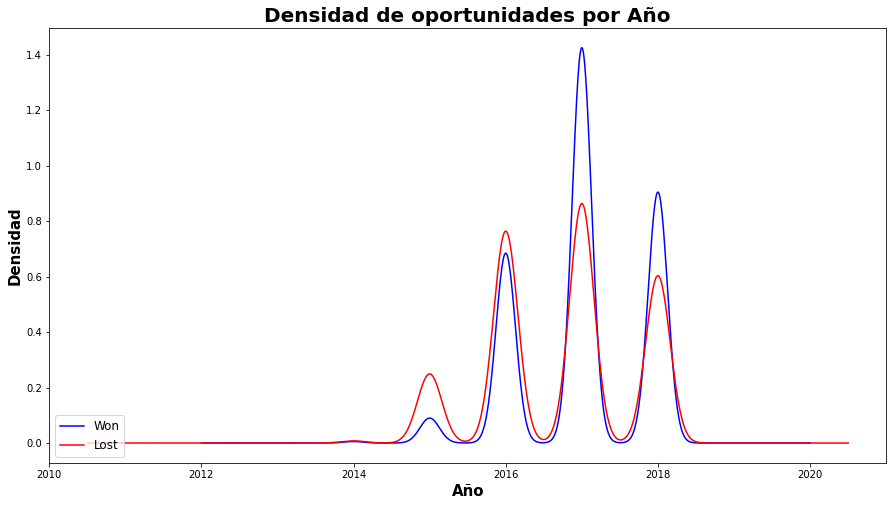

In [23]:
grafico1 = stages_won_per_date['Year'].plot.kde(color='blue') 
h,l = grafico1.get_legend_handles_labels()

grafico2 = stages_lost_per_date['Year'].plot.kde(color='red', figsize=(15,8)) 
k,l = grafico1.get_legend_handles_labels()
grafico1.legend(h[:5],["Won","Lost"], loc=3, fontsize=12)
grafico2.legend(k[:5],["Won","Lost"], loc=3, fontsize=12)
grafico2.set_ylabel("Densidad", fontsize=15, fontweight='bold')
grafico2.set_xlabel("Año", fontsize=15, fontweight='bold')
grafico2.set_title('Densidad de oportunidades por Año', fontsize=20, fontweight='bold')

<function matplotlib.pyplot.show>

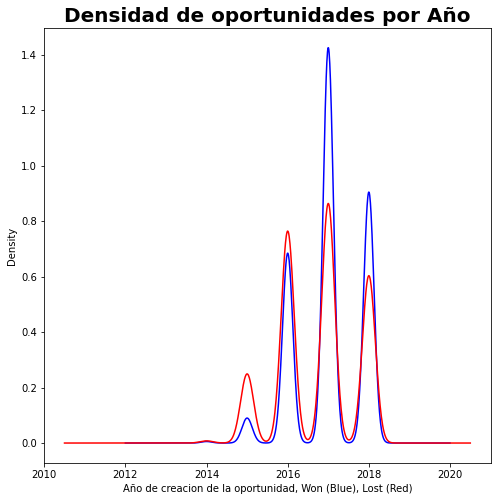

In [24]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title("Densidad de oportunidades por Año", fontsize=20, fontweight='bold')
ax.set_xlabel('Año de creacion de la oportunidad, Won (Blue), Lost (Red)')
stages_won_per_date['Year'].plot.kde(color='blue', figsize=(8,8))
stages_lost_per_date['Year'].plot.kde(color='red', figsize=(8,8))

plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

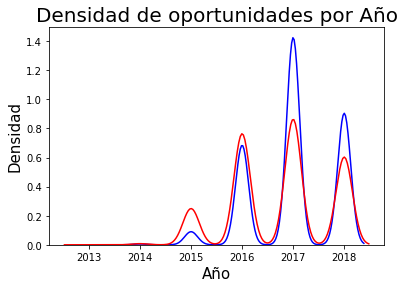

In [25]:
g_won = sns.distplot(stages_won_per_date['Year'], hist=False, color='blue', )
g_lost = sns.distplot(stages_lost_per_date['Year'], hist=False, color='red')
g_won.set_title("Densidad de oportunidades por Año", fontsize=20)
g_won.set_xlabel("Año", fontsize=15)
g_won.set_ylabel("Densidad", fontsize=15)